In [4]:
import numpy as np
import scipy
import scipy.io
import matplotlib.pyplot as plt

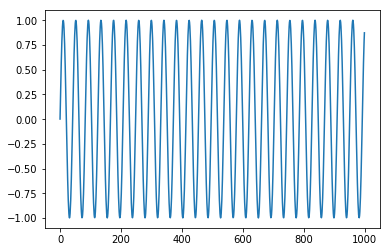

In [120]:
data = scipy.io.loadmat('hw2_p1_data.mat')
data = data['adc_data']
data = np.array(data).T[0]
plt.plot(data[:1000])

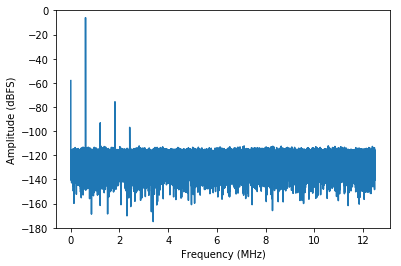

In [121]:
fs = 25e6
FS = 1 - (-1)
raw_fft = np.abs(np.fft.fft(data))
N = len(data)
raw_fft = raw_fft[:int(N/2)]
fft = 20*np.log10(2*raw_fft/N/FS)
f = np.array(range(0, int(N/2))) / N * fs / 1e6
plt.plot(f, fft)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dBFS)')
plt.ylim([-180, 0])
plt.savefig('figs/problem1a.pdf')

In [122]:
maxbin = np.argmax(fft)
maxfreq = f[maxbin]
print(maxbin, maxfreq)

3171 0.6048202514648438


In [133]:
# SNR, noise excludes DC, signal, 2-7th harmonics
sigpower = raw_fft[maxbin]**2
print(sigpower)
noisepower = np.sum([0 if (i % maxbin == 0 and i <= maxbin*7) else raw_fft[i]**2 for i in range(len(raw_fft))])
print(noisepower)
snr = (sigpower / noisepower)
print(snr)
print(10*np.log10(snr))

4286484481.497229
688.0611342413415
6229801.783853874
67.944742287542


In [134]:
# SNDR, noise excludes DC and signal, but includes harmonics
sigpower = raw_fft[maxbin]**2
print(sigpower)
noisepower = np.sum([0 if (i == 0 or i == maxbin) else raw_fft[i]**2 for i in range(len(raw_fft))])
print(noisepower)
sndr = (sigpower / noisepower)
print(sndr)
print(10*np.log10(sndr))

4286484481.497229
1165.7318264808437
3677075.9656081744
65.65502602157046


In [141]:
# THD, distortion power over signal power
sigpower = raw_fft[maxbin]**2
print(sigpower)
distpower = sum(raw_fft[np.array([2,3,4,5,6,7])*maxbin]**2)
print(distpower)
thd = (distpower / sigpower)
print(thd)
print(10*np.log10(thd))

4286484481.497229
477.67069223950205
1.1143646834635363e-07
-69.5297266006215


In [143]:
# SFDR, max spur power over signal power
sigpower = raw_fft[maxbin]**2
print(sigpower)
spurpower = raw_fft[maxbin*3]**2
print(spurpower)
sfdr = (sigpower / spurpower)
print(sfdr)
print(10*np.log10(sfdr))

4286484481.497229
465.5959474179288
9206447.146434437
69.6409206424828
